In [1]:
%run /Users/will/dsi/PortlandPD/src/functions.py
df = start_with_combined()
import datetime

plt.style.use('fivethirtyeight')
font = {'weight': 'bold',
        'size':   8}
plt.rc('font', **font)


In [2]:
date_range = date_range_of_set(df, 'ReportMonthYear')
dfs_by_date = split_df_by_date(df, date_range)

In [8]:
df.columns

Index(['Address', 'CallNumber', 'FinalCallCategory', 'FinalCallGroup',
       'Neighborhood', 'OpenDataLat', 'OpenDataLon', 'OpenDataX', 'OpenDataY',
       'Priority', 'ReportMonthYear', 'ResponseTime_sec', 'TimeInQueue_sec',
       'TravelTime_sec'],
      dtype='object')

In [10]:
dfs_by_date
dfs_crime_counts_by_date = []
for i in range(len(dfs_by_date)):
    dfs_crime_counts_by_date.append(
        dfs_by_date[i].groupby('FinalCallCategory').count().sort_values('Priority', ascending=False))
dfs_crime_counts_by_date[0].loc['Disturbance']['Priority']

1823

In [11]:
def pull_crime_counts(df_list, call_type):
    lst_of_counts = []
    for i in range(len(df_list)):
        lst_of_counts.append(df_list[i].loc[call_type]['Priority'])
    return lst_of_counts

# disturbance_counts = pull_crime_counts(dfs_crime_counts_by_date, 'Disturbance')

In [12]:
calls_of_interest = ['Disturbance', 'Theft', 'Welfare Check', 'Unwanted Person',
                     'Suspicious', 'Collision', 'Burglary', 'Alarm', 'Assist', 
                     'Stolen Vehicle', 'Vice', 'Robbery']

In [13]:
lst_of_crime_counts = []

for i in range(len(calls_of_interest)):
    lst_of_crime_counts.append(pull_crime_counts(dfs_crime_counts_by_date, calls_of_interest[i]))
# lst_of_crime_counts[0]

# Change to datetime if needed
# type(date_range[0])
# datetime.datetime.strptime(date_range[0], '%Y-%m-%d')
# datetime_list = [datetime.datetime.strptime(i, '%Y-%m-%d') for i in date_range]

In [14]:
x_vals = datetime_list
y_vals = lst_of_crime_counts

fig, ax = plt.subplots(4, 3, figsize=(20,15))
for i, ax in enumerate(ax.flatten()):
    ax.plot(x_vals, y_vals[i], color='b', linewidth=1)
    ax.set_ylabel('Call Count', fontweight='bold')
    ax.set_xlabel('Date', fontweight='bold')
    ax.set_title(f'{calls_of_interest[i]}', fontweight='bold')
plt.tight_layout(pad=5, w_pad=0.5, h_pad=2.0)


# plt.savefig('/Users/will/dsi/PortlandPD/images/12_crime_types.png')

NameError: name 'datetime_list' is not defined

In [166]:
# Normalize these calls:
# Get total call counts:
df_count_by_month = df.groupby('ReportMonthYear').count()['Priority']
df_count_by_month
total_call_count_list = list(df_count_by_month)
# total_call_count_list

In [173]:
# Create a new list of normalized y_vals and repeat the graph:
def divide_by_normalizer(lst):
    return [i / j for i, j in zip(lst, total_call_count_list)]
normalized_lst = []
for i in y_vals:
    normalized_lst.append(divide_by_normalizer(i))
# normalized_lst[0]

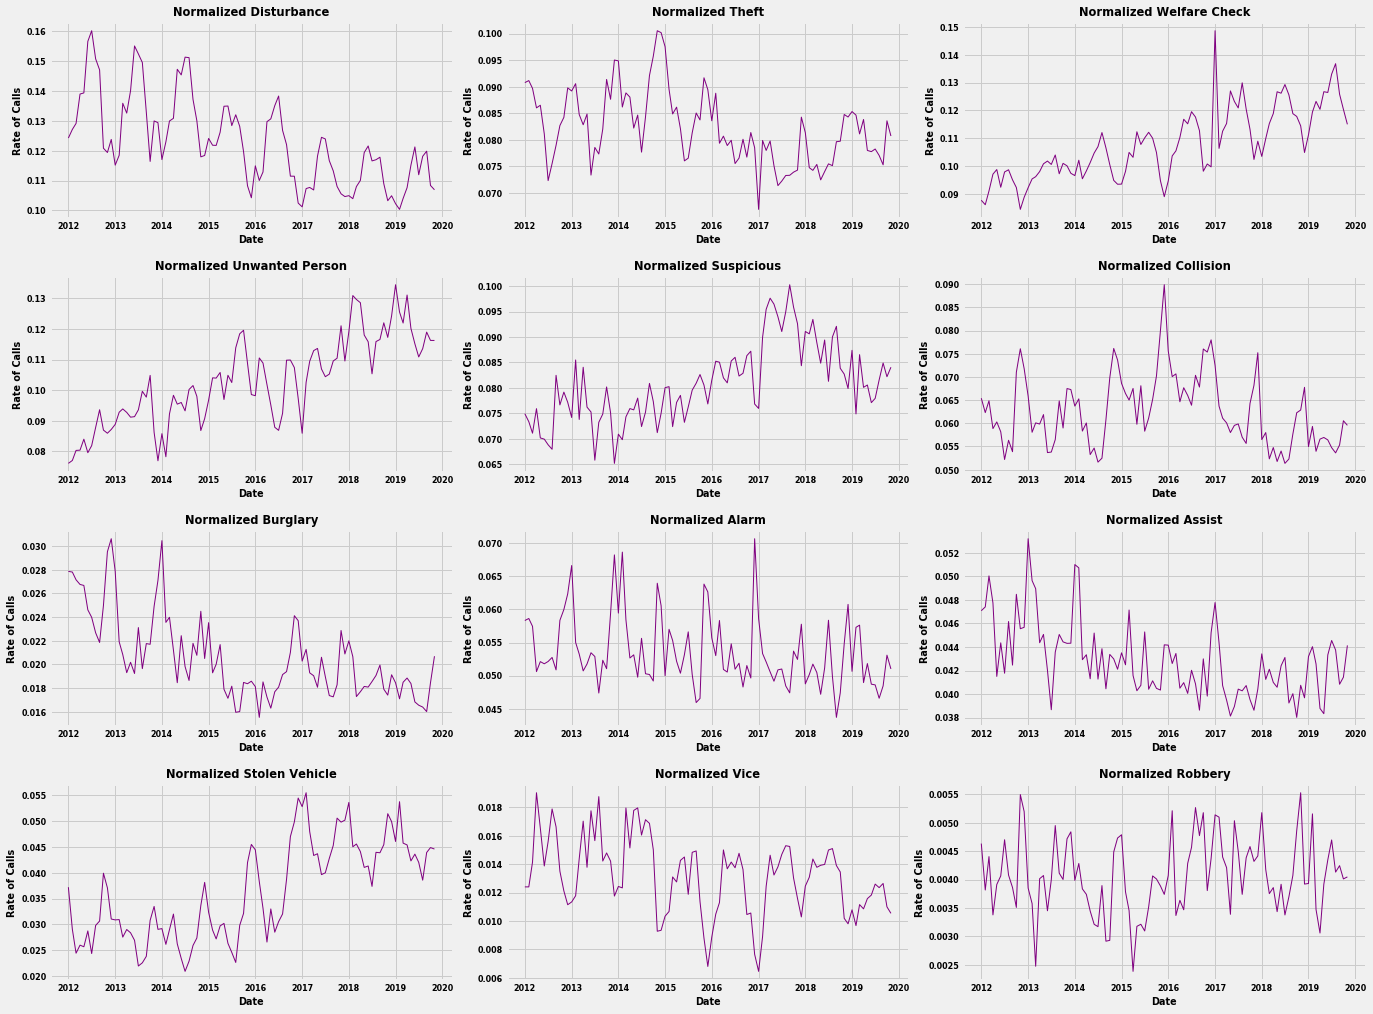

In [182]:
# Repeat graph from above:

fig, ax = plt.subplots(4, 3, figsize=(20,15))
for i, ax in enumerate(ax.flatten()):
    ax.plot(x_vals, normalized_lst[i], color='purple', linewidth=1)
    ax.set_ylabel('Rate of Calls', fontweight='bold')
    ax.set_xlabel('Date', fontweight='bold')
    ax.set_title(f'Normalized {calls_of_interest[i]}', fontweight='bold')
plt.tight_layout(pad=5, w_pad=0.5, h_pad=2.0)

plt.savefig('/Users/will/dsi/PortlandPD/images/normalized_12_crime_types.png')